# Table of contents
- [Importing Libraries And Packages](#lib)
- [Reading the dataset](#data)
- [Changing the names of the column headers](#change)
- [Understanding the data](#under)
- [Missing values](#miss)
- [Summary statistics](#summary)
- [Feature Engineering](#feature)
- [Scaling the data](#scaling)
- [Spliting the data](#spliting)
- [Modeling](#model)
- [Best models](#best)

<a name='lib'> </a>
# Importing Libraries And Packages

In [1]:
# importing the Packages
import pandas as pd
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling as pp
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/concrete-comprehensive-strength/Concrete_Data.xls


In [2]:
pip install xlrd

     |████████████████████████████████| 96 kB 375 kB/s 
Note: you may need to restart the kernel to use updated packages.


<a name='data' ></a>
# Reading The Dataset

In [3]:
#Reading the dataset
data=pd.read_excel('/kaggle/input/concrete-comprehensive-strength/Concrete_Data.xls')
data.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

<a name='change' ></a>
# Changing the names of the column headers

In [4]:
# Change the names of the column headers
columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag',
        'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
        'Water  (component 4)(kg in a m^3 mixture)':'water',
        'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate',
        'Age (day)':'age','Concrete compressive strength(MPa, megapascals) ':'concrete_compressive_strength'}
data.rename(columns=columns,inplace=True)
data.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate  age  concrete_compressive_strength  
0            1040.0           676.0   28                      79.986111  
1            1055.0           676.0   28                      61.887366  
2             932.0           594.0  270                      40.269535  
3             932.0           594.0  365                      41.052780  
4             978.4           825.5  360                      44.296075

<a name='under' ></a>
# Understanding the data

In [5]:
# Quick undersatning of the data
# the shape of th data
print('The data consists of {columns} columns and {rows} rows'.format(columns=data.shape[1],rows=data.shape[0]))

The data consists of 9 columns and 1030 rows


In [6]:
# Data Types
data.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

<a name='miss' ></a>
# Missing Values

<AxesSubplot:>

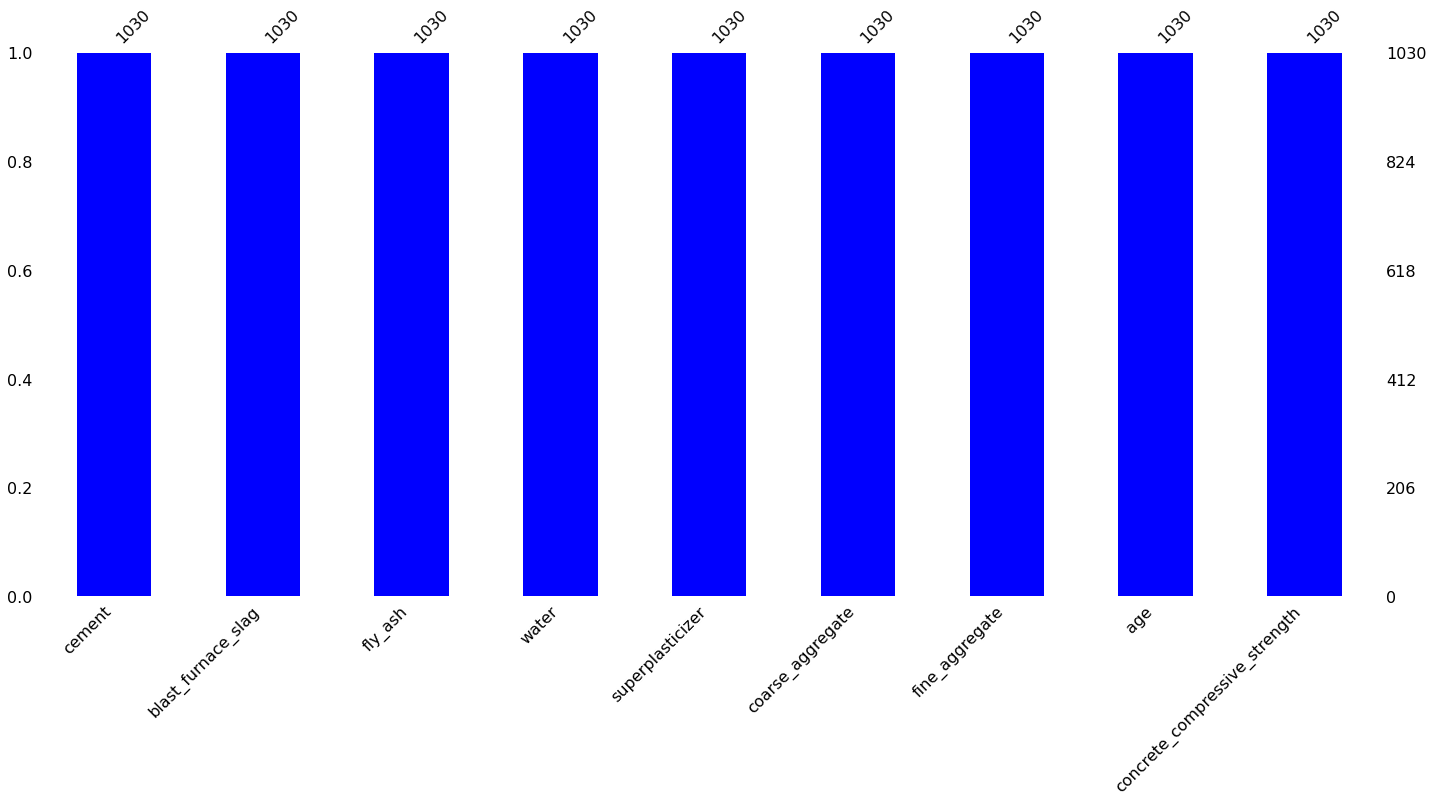

In [7]:
# checking the missing values
msno.bar(data,color='blue')

<a name='summary' ></a>
# Summary Statistics

In [8]:
# summary statstics with pandas_profiling 
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
data.describe()

cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.165631           73.895485    54.187136   181.566359   
std     104.507142           86.279104    63.996469    21.355567   
min     102.000000            0.000000     0.000000   121.750000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.270000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate          age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.203112        972.918592      773.578883    45.662136   
std            5.973492         77.753818       80.175427    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.350000        968.000000      779.510000    28.000000   
75%           10.160000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       concrete_compressive_strength  
count                    1030.000000  
mean                       35.817836  
std                        16.705679  
min                         2.331808  
25%                        23.707115  
50%                        34.442774  
75%                        46.136287  
max                        82.599225

<a name='feature' ></a>
# Feature Engineering

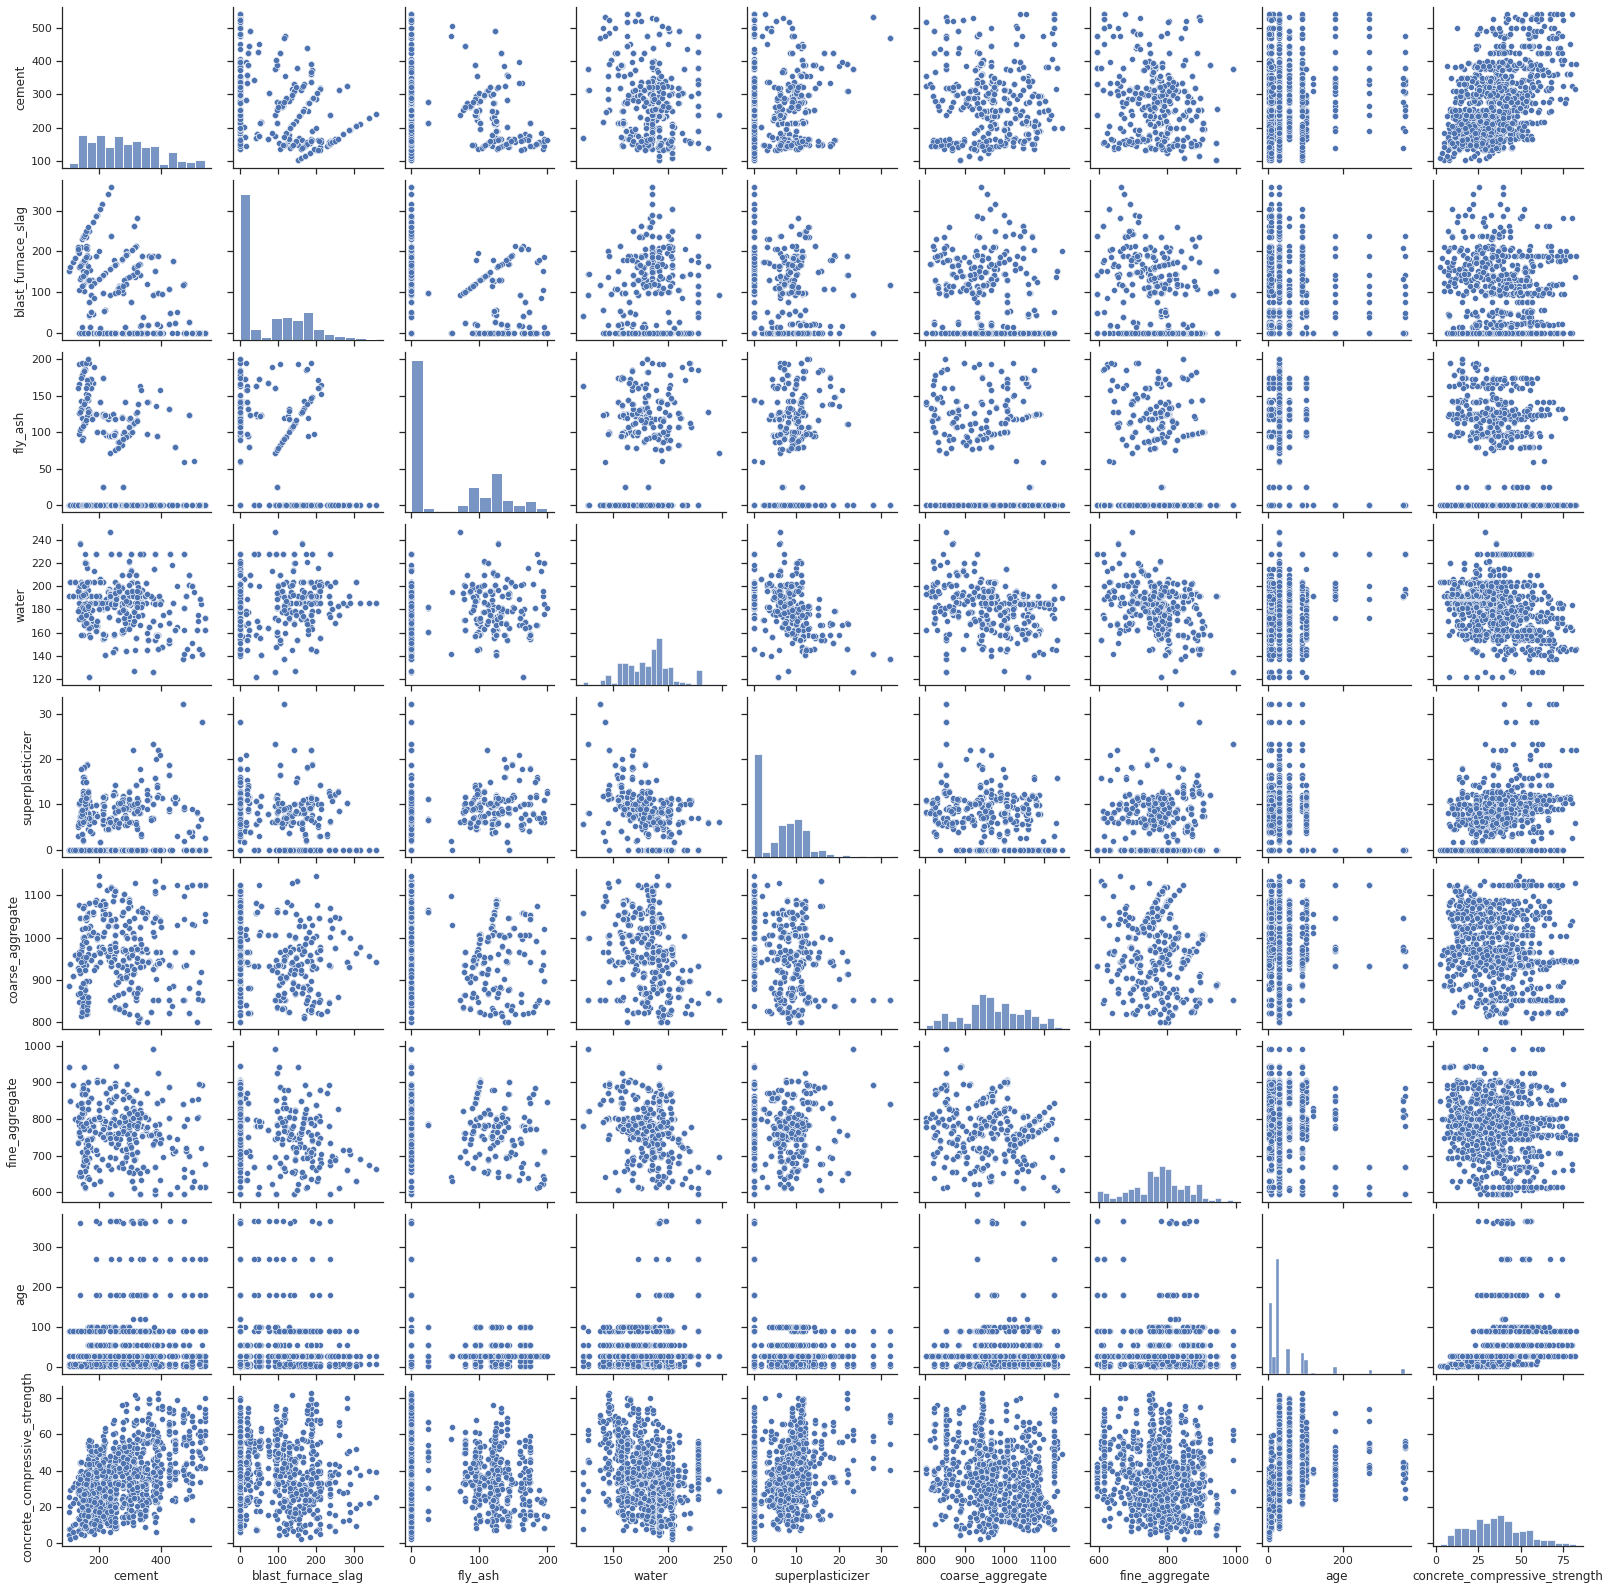

In [10]:
# feature engineering
#pairplot
sns.set_theme(style="ticks")
sns.pairplot(data,)
plt.show()

In [11]:
# correlation between concrete_compressive_strength(label) and the rest (features)
corr=data.corr()
corr['concrete_compressive_strength']
correlation_df=pd.Series(corr['concrete_compressive_strength']).to_frame()
correlation_df.sort_values(by='concrete_compressive_strength',ascending=False)

concrete_compressive_strength
concrete_compressive_strength                       1.000000
cement                                              0.497833
superplasticizer                                    0.366102
age                                                 0.328877
blast_furnace_slag                                  0.134824
fly_ash                                            -0.105753
coarse_aggregate                                   -0.164928
fine_aggregate                                     -0.167249
water                                              -0.289613

In [12]:
# spliting the data to X(features) and y(label)
X=data.drop('concrete_compressive_strength',axis=1)
y=data['concrete_compressive_strength']

In [13]:
# creating a function to calculate cumulative distribution function
def cdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,1+n)/n
    return x,y

In [14]:
# calculating the cdf for y
x_label,y_label=cdf(data['concrete_compressive_strength'])
fig=px.scatter(x=x_label,y=y_label)
fig.update_layout(title='CDF of concrete compressive strength ',xaxis_title='concrete compressive strength',yaxis_title='CDF',legend_title='Legend'
                ,font_size=10 )
fig.update_layout({'plot_bgcolor':'white'})
fig.show()

<AxesSubplot:>

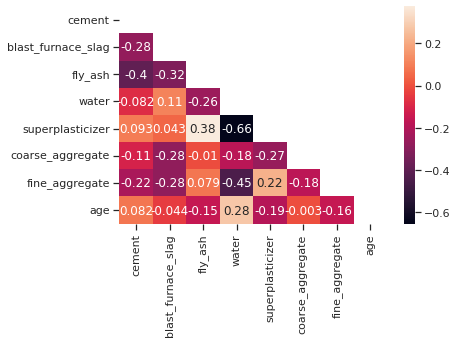

In [15]:
# The correlation between the features
X_corr=X.corr()
mask=np.triu(np.ones_like(X_corr,dtype='bool'))
sns.heatmap(X_corr,mask=mask,annot=True)

<a name='scaling' ></a>
# Scaling The Data

In [16]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X) 

<a name='spliting' ></a>
# Spliting The Data

In [17]:
# spliting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=1111)

<a name='model' ></a>
# Modeling The Data

In [18]:
#modeling 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor


In [19]:
linreg=LinearRegression()
ridge=Ridge()
lasso=Lasso()
svr=LinearSVR()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
xg_re=xgb.XGBRegressor(objective='reg:linear',n_estimators=10)
ad=AdaBoostRegressor(base_estimator=dt,n_estimators=400)
br=BaggingRegressor(base_estimator=dt,n_estimators=400)
gbr=GradientBoostingRegressor(n_estimators=300,max_depth=1)
rfr=RandomForestRegressor(n_estimators=400)
models=[('Linear Regression',linreg),('Ridge Regression',ridge),('Lasso Regression',lasso),
       ('Support Vector Machine',svr),('K Nearest Neighbours',knn),('Decision Tree',dt),('Extreme Gradient Boosting',xg_re),
       ('Ada Boost',ad),('Bagging Regressor',br),('Gradient Boosting',gbr),('Random Forest',rfr)]

In [20]:
from sklearn.metrics import mean_squared_error
mean={}
for model_name ,model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('mean squered error for {} : {}'.format(model_name,mean_squared_error(y_test,y_pred)))
    mean[model_name]=mean_squared_error(y_test,y_pred)

mean squered error for Linear Regression : 99.41298101691936
mean squered error for Ridge Regression : 99.44198648137207
mean squered error for Lasso Regression : 104.49082711898055
mean squered error for Support Vector Machine : 97.13482945107037
mean squered error for K Nearest Neighbours : 73.50431529015492
mean squered error for Decision Tree : 36.45222968024985
[21:32:38] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
mean squered error for Extreme Gradient Boosting : 24.750997146294598
mean squered error for Ada Boost : 36.39224972744077
mean squered error for Bagging Regressor : 20.278984100929716
mean squered error for Gradient Boosting : 33.92033928424396
mean squered error for Random Forest : 21.092127566029333


In [21]:
mean_df=pd.Series(mean).to_frame()
mean_df=mean_df.rename(columns={0:'mean_squared_error'})
mean_df.sort_values(by='mean_squared_error')

mean_squared_error
Bagging Regressor                   20.278984
Random Forest                       21.092128
Extreme Gradient Boosting           24.750997
Gradient Boosting                   33.920339
Ada Boost                           36.392250
Decision Tree                       36.452230
K Nearest Neighbours                73.504315
Support Vector Machine              97.134829
Linear Regression                   99.412981
Ridge Regression                    99.441986
Lasso Regression                   104.490827

<a name='best' ></a>
# Best models

In [22]:
# Random Forest
rfr.fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)
print('Training score is {}'.format(rfr.score(X_train,y_train).round(2)))
print('test score is {}'.format(rfr.score(X_test,y_test).round(2)))


Training score is 0.99
test score is 0.92


In [23]:
# Bagging regressor
br.fit(X_train,y_train)
y_pred_br=br.predict(X_test)
print('Training score is {}'.format(br.score(X_train,y_train).round(2)))
print('test score is {}'.format(br.score(X_test,y_test).round(2)))

Training score is 0.99
test score is 0.92
